In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import matplotlib.patches as patches
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_folder = "/content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad"
images = os.listdir(image_folder)
print(f"Total images: {len(images)}")
print("Sample images:", images[:5])

Total images: 180
Sample images: ['frame_0930.jpg', 'frame_1050.jpg', 'frame_0650.jpg', 'frame_0860.jpg', 'frame_0770.jpg']


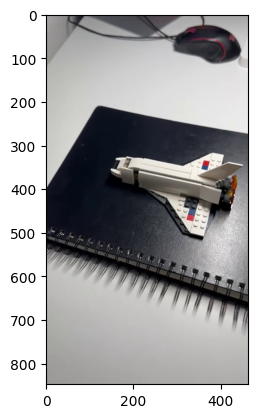

In [ ]:
sample_image_name = images[55]
sample_image_path = os.path.join(image_folder, sample_image_name)
img = Image.open(sample_image_path)
plt.imshow(img)
plt.show()

In [ ]:
# Load the CSV file
# YOLO format labels are located at this folder: real_life_shuttle_labels_YOLO
label_file = "/content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/real_life_shuttle_labels.csv"
labels_df = pd.read_csv(label_file)

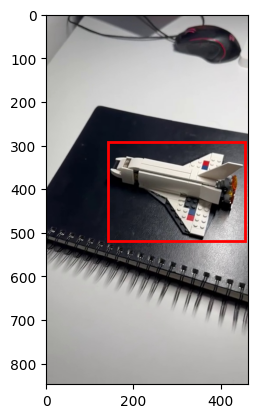

In [ ]:
# Find the label information for the chosen image
label_info = labels_df[labels_df['image_name'] == sample_image_name].iloc[0]

# Extract the bounding box coordinates
bbox_x = label_info['bbox_x']
bbox_y = label_info['bbox_y']
bbox_width = label_info['bbox_width']
bbox_height = label_info['bbox_height']
img = Image.open(sample_image_path)
fig, ax = plt.subplots()
ax.imshow(img)

# Draw the bounding box in red
rect = patches.Rectangle((bbox_x, bbox_y), bbox_width, bbox_height, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)
plt.show()

In [3]:
notebook_dir = '/content/drive/MyDrive/Final_Project_Ahmad/'
os.chdir(notebook_dir)
os.getcwd()

'/content/drive/MyDrive/Final_Project_Ahmad'

**!!!!!!!!!!!!DO NOT RUN THIS SECTION AGAIN!!!!!!!!!!!!**:

In [ ]:
import shutil
import os
import random
from sklearn.model_selection import train_test_split

# Define directories
images_dir = '/content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad'
labels_dir = '/content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/real_life_shuttle_labels_YOLO'

# Create directories for train/val splits
train_images_dir = os.path.join(images_dir, 'images', 'train')
val_images_dir = os.path.join(images_dir, 'images', 'val')
train_labels_dir = os.path.join(images_dir, 'train', 'labels')
val_labels_dir = os.path.join(images_dir, 'val', 'labels')

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# List all image files and corresponding label files
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg') or f.endswith('.png')]
label_files = [f.replace('.jpg', '.txt').replace('.png', '.txt') for f in image_files]

# Split the data (80% for train, 20% for validation)
train_images, val_images = train_test_split(image_files, test_size=0.2, random_state=42)

# Move images to train/val directories
for img in train_images:
    shutil.move(os.path.join(images_dir, img), os.path.join(train_images_dir, img))

for img in val_images:
    shutil.move(os.path.join(images_dir, img), os.path.join(val_images_dir, img))

# Move corresponding labels to train/val label directories
for label_file in label_files:
    if label_file.replace('.txt', '.jpg') in train_images:
        shutil.move(os.path.join(labels_dir, label_file), os.path.join(train_labels_dir, label_file))
    elif label_file.replace('.txt', '.jpg') in val_images:
        shutil.move(os.path.join(labels_dir, label_file), os.path.join(val_labels_dir, label_file))

print("Images and labels have been split and moved into train/val directories.")


Images and labels have been split and moved into train/val directories.


**!!!!!!!!!!!!DO NOT RUN THE SECTION ABOVE AGAIN!!!!!!!!!!!!**:

In [18]:
yaml_path = '/content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/data.yaml'

# Creating the content of the YAML file
yaml_content = """
train: /content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/images/train
val: /content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/images/val

train_labels: /content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/labels/train
val_labels: /content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/labels/val

nc: 1  # Number of classes (shuttle)
names: ['shuttle']  # Class names
"""

# Writing the content to the YAML file
with open(yaml_path, 'w') as file:
    file.write(yaml_content)

print(f"data.yaml file has been created at {yaml_path}")


data.yaml file has been created at /content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/data.yaml


In [46]:
!cat /content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/data.yaml

train: /content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/images/train
val: /content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/images/val

train_labels: /content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/labels/train
val_labels: /content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/labels/val

nc: 1  # Number of classes (shuttle)
names: ['shuttle']  # Class names


In [47]:
from yolov5 import train

In [5]:
data_yaml = '/content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/data.yaml'


In [49]:
!python3 /usr/local/lib/python3.10/dist-packages/yolov5/train.py --img 640 --batch 16 --epochs 50 --data {data_yaml} --cfg yolov5s.yaml --weights /content/drive/MyDrive/Final_Project_Ahmad/yolov5s.pt --nosave

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-02 16:52:56.485229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-02 16:52:56.510822: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-02 16:52:56.518066: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose "Don't visualize my results"
t

In [54]:
os.listdir('/content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/weights')

['last.pt']

In [9]:
!python3 /usr/local/lib/python3.10/dist-packages/yolov5/val.py \
--weights /content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/weights/last.pt \
--data /content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/data.yaml \
--imgsz 640 \
--project /content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/evals \
--name eval_results \
--exist-ok


val: data=/content/drive/MyDrive/Final_Project_Ahmad/Assembled_shuttle_realife_data_ahmad/data.yaml, weights=['/content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/weights/last.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=/content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/evals, name=eval_results, exist_ok=True, half=False, dnn=False
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 2024-12-2 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1dD8iCs_Hqyw0I8SeVtWxfTQCK9491CUe/Assembled_shuttle_realife_data_ahmad/labels/val.cache... 36 images, 0 backgrounds, 0 corrupt: 100% 36/36 [00:00<?, ?it/s]
        

In [11]:
!ls /content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/evals/eval_results/

confusion_matrix.png  P_curve.png   R_curve.png   val_batch0_labels.jpg  val_batch1_labels.jpg
F1_curve.png	      PR_curve.png  results.html  val_batch0_pred.jpg	 val_batch1_pred.jpg


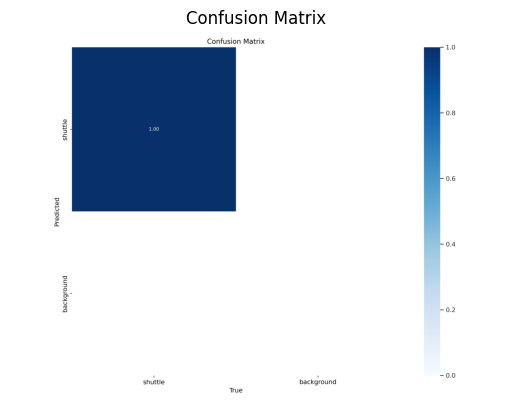

In [12]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt
confusion_matrix_path = '/content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/evals/eval_results/confusion_matrix.png'

# Open and display the image
img = PILImage.open(confusion_matrix_path)
plt.imshow(img)
plt.axis('off')
plt.title("Confusion Matrix")
plt.show()


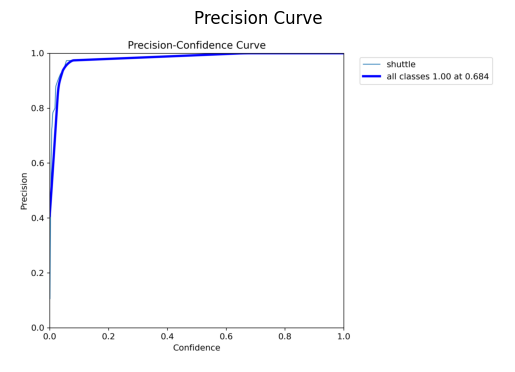

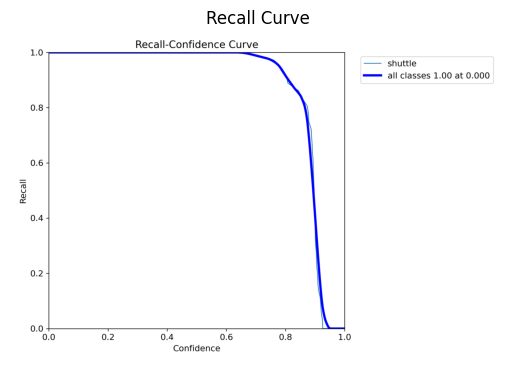

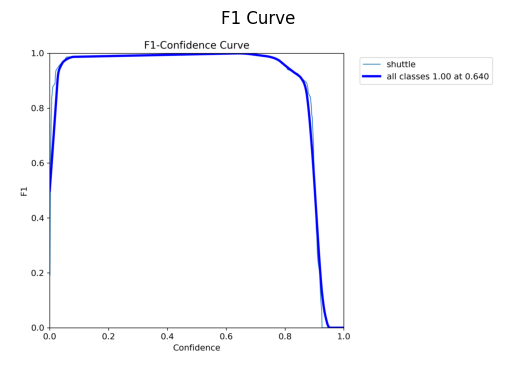

In [13]:
curve_files = {
    "Precision Curve": "/content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/evals/eval_results/P_curve.png",
    "Recall Curve": "/content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/evals/eval_results/R_curve.png",
    "F1 Curve": "/content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/evals/eval_results/F1_curve.png",
}
for title, file_path in curve_files.items():
    img = PILImage.open(file_path)
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()


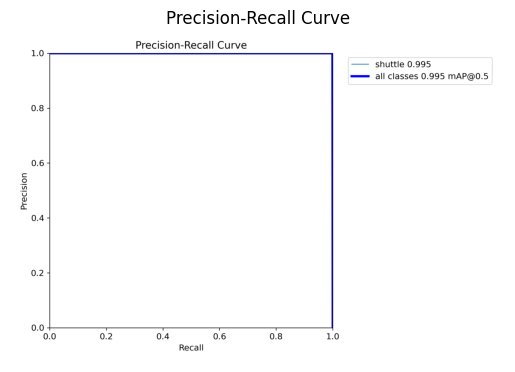

In [14]:
pr_curve_path = '/content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/evals/eval_results/PR_curve.png'

img = PILImage.open(pr_curve_path)
plt.imshow(img)
plt.axis('off')
plt.title("Precision-Recall Curve")
plt.show()


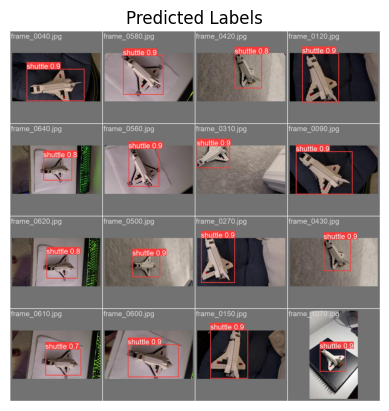

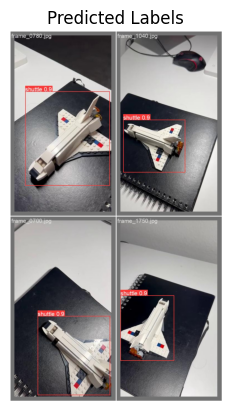

In [15]:
pred_files = [
    "/content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/evals/eval_results/val_batch0_pred.jpg",
    "/content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/evals/eval_results/val_batch1_pred.jpg"
]

# Display prediction images
for file_path in pred_files:
    img = PILImage.open(file_path)
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.title("Predicted Labels")
    plt.show()


detect: weights=['/content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/weights/last.pt'], source=/content/drive/MyDrive/Final_Project_Ahmad/Model_Test/test_1.jpg, data=../../../../usr/local/lib/python3.10/dist-packages/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/Final_Project_Ahmad/Model_Test/output, name=custom_test, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 2024-12-2 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Final_Project_Ahmad/Model_Test/test_1.jpg: 6

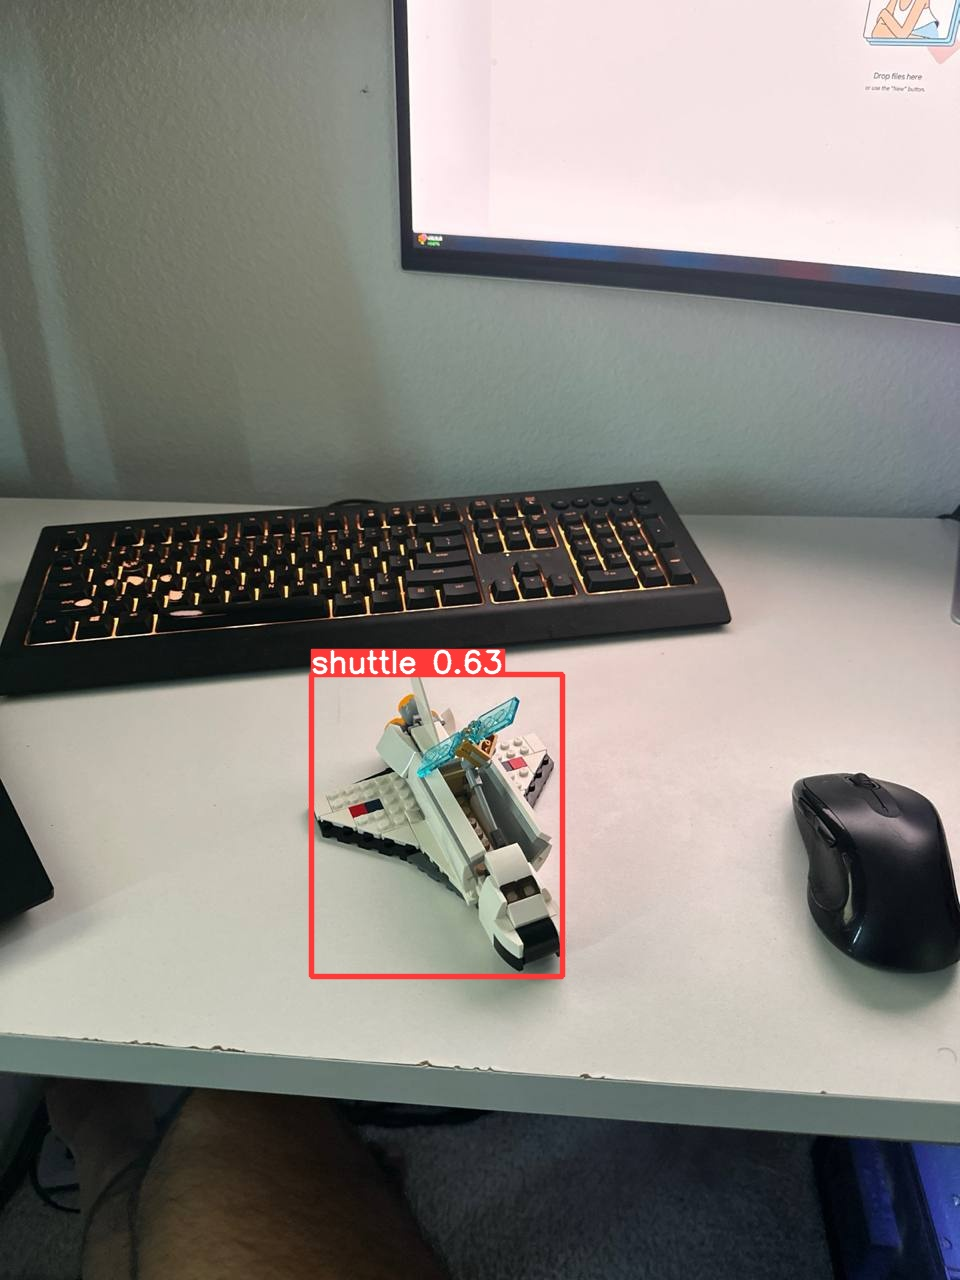

In [16]:
import os
from IPython.display import Image as IPImage, display

model_weights = '/content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/weights/last.pt'  # Path to the trained model
input_image = '/content/drive/MyDrive/Final_Project_Ahmad/Model_Test/test_1.jpg'  # Path to new image for testing (never seen before)
output_dir = '/content/drive/MyDrive/Final_Project_Ahmad/Model_Test/output'  # Directory to save results
os.makedirs(output_dir, exist_ok=True)

# Run inference using detect.py
!python3 /usr/local/lib/python3.10/dist-packages/yolov5/detect.py \
    --weights $model_weights \
    --source $input_image \
    --img 640 \
    --conf-thres 0.25 \
    --project $output_dir \
    --name custom_test \
    --exist-ok

# Display the output image
output_image_path = os.path.join(output_dir, 'custom_test', os.path.basename(input_image))
display(IPImage(filename=output_image_path))


detect: weights=['/content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/weights/last.pt'], source=/content/drive/MyDrive/Final_Project_Ahmad/Model_Test/test_2.jpg, data=../../../../usr/local/lib/python3.10/dist-packages/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/Final_Project_Ahmad/Model_Test/output, name=custom_test, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 2024-12-2 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Final_Project_Ahmad/Model_Test/test_2.jpg: 6

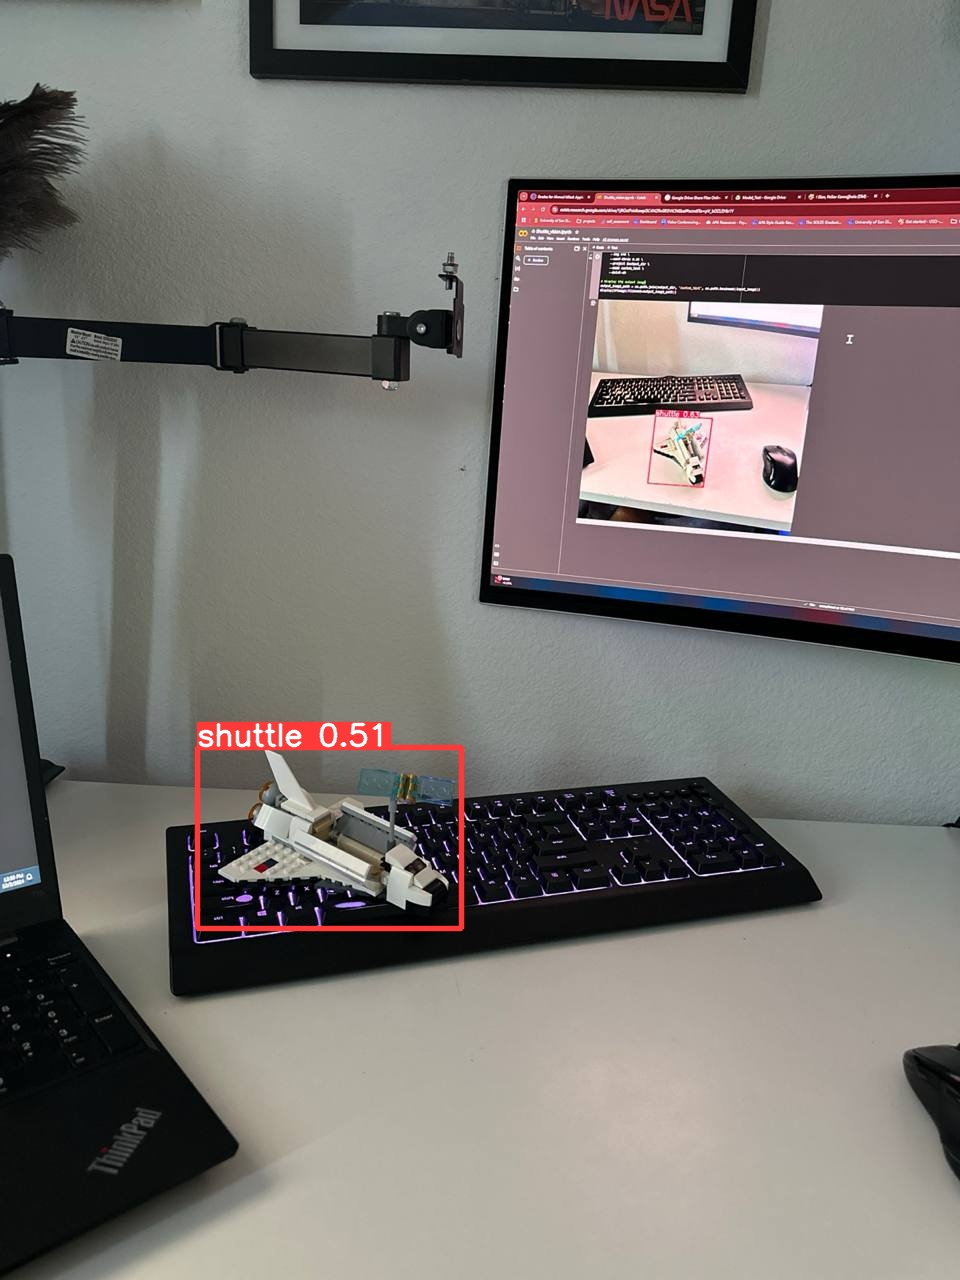

In [17]:
import os
from IPython.display import Image as IPImage, display

model_weights = '/content/drive/MyDrive/Final_Project_Ahmad/runs/train/exp7/weights/last.pt'  # Path to the trained model
input_image = '/content/drive/MyDrive/Final_Project_Ahmad/Model_Test/test_2.jpg'  # Path to new image for testing (never seen before)
output_dir = '/content/drive/MyDrive/Final_Project_Ahmad/Model_Test/output'  # Directory to save results
os.makedirs(output_dir, exist_ok=True)

# Run inference using detect.py
!python3 /usr/local/lib/python3.10/dist-packages/yolov5/detect.py \
    --weights $model_weights \
    --source $input_image \
    --img 640 \
    --conf-thres 0.25 \
    --project $output_dir \
    --name custom_test \
    --exist-ok

# Display the output image
output_image_path = os.path.join(output_dir, 'custom_test', os.path.basename(input_image))
display(IPImage(filename=output_image_path))
